In [1]:
pip install wheel Cmake pybind11

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -i https://testpypi.python.org/pypi nmslib

Looking in indexes: https://testpypi.python.org/pypi
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install glob2==0.7  multiprocess==0.70.12.2 pickle-mixin==1.0.2


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cycler==0.11.0 joblib==1.1.0 networkx==2.5.1 numpy==1.19.5 pandas==1.1.5 pymongo==3.12.1 python-louvain==0.15 pyyaml==5.4.1 scikit-learn==1.4.0 scipy==1.5.4 scispacy==0.4.0 seaborn==0.11.2 thinc==7.4.1 tqdm==4.62.3

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached networkx-2.5.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pymongo-3.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.8 kB)
  Using cached python-louvain-0.15.tar.gz (204 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exi

In [5]:
pip install pymongo spacy wosfile matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [6]:
import  wheel, networkx, scipy, community, tqdm, pymongo, spacy, scispacy, pybind11, nmslib, wosfile, community, numpy, pandas, matplotlib, seaborn

In [2]:
#from git import Repo

# specify the URL of the repository and the local path where you want to clone it
#repo_url = 'https://github.com/FlorenceBL/novelpy.git'
#local_path = 'C://Users//FlorenceBlandinieres//OneDrive - Technopolis Group Ltd//RD_pub_patentforecast//test_Marchnovelpy'
# clone the repository
#Repo.clone_from(repo_url, local_path)

<git.repo.base.Repo 'C:\\Users\\FlorenceBlandinieres\\OneDrive - Technopolis Group Ltd\\RD_pub_patentforecast\\test_Marchnovelpy\\.git'>

In [3]:
#import sys
#sys.path.append(local_path)
#novelpy
#/workspaces/novelpy/novelpy

In [7]:
import novelpy

In [8]:
from novelpy.utils.get_sample import download_sample

download_sample() #exports to the folder where the script is located and creates a new folder Data > docs> datasets

Citation_net_sample.zip: 100%|██████████| 191M/191M [00:08<00:00, 25.1MiB/s] 
Meshterms_sample.zip: 100%|██████████| 149M/149M [00:06<00:00, 24.3MiB/s] 
Ref_Journals_sample.zip: 100%|██████████| 16.0M/16.0M [00:03<00:00, 5.32MiB/s]
Title_abs_sample.zip: 100%|██████████| 784M/784M [02:32<00:00, 5.38MiB/s] 
authors_sample.zip: 100%|██████████| 396M/396M [00:16<00:00, 24.7MiB/s] 


In [12]:
#creates a set of cooccruences matrices for each year of publication in a distinct folder within the Data folder
#we use sparse matrices, index2name.p and name2index.p are required to convert the name of items to index in our matrix before running Foster

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Ref_Journals_sample",
                 year_var="year",
                 var = "c04_referencelist",
                 sub_var = "item",
                 time_window = range(1995,2016), #1995 to 2016
                 weighted_network = True, self_loop = True)

ref_cooc.main() 

For each year in range: 100%|██████████| 21/21 [00:33<00:00,  1.60s/it]


In [22]:
#pip install --upgrade python-louvain

Note: you may need to restart the kernel to use updated packages.


In [9]:
import tqdm
#from community import best_partition
import community

#here computes the novelty indicator for a 11 years: 2000-2011
for focal_year in tqdm.tqdm(range(2000, 2011), desc = "Computing indicator for window of time"):
    Foster = novelpy.indicators.Foster2015(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           starting_year = 1995, #1995 initially
                                           community_algorithm = "Louvain",
                                           density = True)
    Foster.get_indicator() #exports to the folder where the script is located and creates a folder Results. Then adds a subfolder with "foster" indicating which scoring is stored within

Computing indicator for window of time:   0%|          | 0/11 [00:00<?, ?it/s]

loading cooc for focal year 2000
cooc loaded !
loading items for papers in 2000


get_papers_item: 100%|██████████| 49872/49872 [00:00<00:00, 725628.33it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2000
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:   9%|▉         | 1/11 [00:31<05:11, 31.14s/it]

saved
Done !
loading cooc for focal year 2001
cooc loaded !
loading items for papers in 2001


get_papers_item: 100%|██████████| 52046/52046 [00:00<00:00, 194645.56it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2001
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  18%|█▊        | 2/11 [01:02<04:41, 31.32s/it]

saved
Done !
loading cooc for focal year 2002
cooc loaded !
loading items for papers in 2002


get_papers_item: 100%|██████████| 54721/54721 [00:00<00:00, 170490.36it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2002
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  27%|██▋       | 3/11 [01:38<04:27, 33.44s/it]

saved
Done !
loading cooc for focal year 2003
cooc loaded !
loading items for papers in 2003


get_papers_item: 100%|██████████| 58439/58439 [00:00<00:00, 708458.14it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2003
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  36%|███▋      | 4/11 [02:16<04:07, 35.29s/it]

saved
Done !
loading cooc for focal year 2004
cooc loaded !
loading items for papers in 2004


get_papers_item: 100%|██████████| 62241/62241 [00:00<00:00, 225411.74it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2004
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  45%|████▌     | 5/11 [03:00<03:51, 38.50s/it]

saved
Done !
loading cooc for focal year 2005
cooc loaded !
loading items for papers in 2005


get_papers_item: 100%|██████████| 67361/67361 [00:00<00:00, 513023.88it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2005
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  55%|█████▍    | 6/11 [03:49<03:28, 41.80s/it]

saved
Done !
loading cooc for focal year 2006
cooc loaded !
loading items for papers in 2006


get_papers_item: 100%|██████████| 70501/70501 [00:00<00:00, 257263.14it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2006
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  64%|██████▎   | 7/11 [04:49<03:10, 47.74s/it]

saved
Done !
loading cooc for focal year 2007
cooc loaded !
loading items for papers in 2007


get_papers_item: 100%|██████████| 75717/75717 [00:00<00:00, 506361.19it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2007
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  73%|███████▎  | 8/11 [05:54<02:40, 53.42s/it]

saved
Done !
loading cooc for focal year 2008
cooc loaded !
loading items for papers in 2008


get_papers_item: 100%|██████████| 81228/81228 [00:00<00:00, 579154.09it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2008
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  82%|████████▏ | 9/11 [07:00<01:54, 57.23s/it]

saved
Done !
loading cooc for focal year 2009
cooc loaded !
loading items for papers in 2009


get_papers_item: 100%|██████████| 84496/84496 [00:00<00:00, 267313.36it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2009
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  91%|█████████ | 10/11 [08:21<01:04, 64.69s/it]

saved
Done !
loading cooc for focal year 2010
cooc loaded !
loading items for papers in 2010


get_papers_item: 100%|██████████| 89168/89168 [00:00<00:00, 278152.48it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2010
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time: 100%|██████████| 11/11 [10:04<00:00, 54.96s/it]

saved
Done !


In [ ]:
# Results are stored for a given publication year and provides a scoring of novelty in a dictionnary such:
#{"PMID": 11724777, "c04_referencelist_foster": {"scores_array": [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0], "score": {"novelty": 0.7}}, "year": 2002}

/workspaces/novelpy/novelpy/utils/companion.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df,df_temp], ignore_index=True)


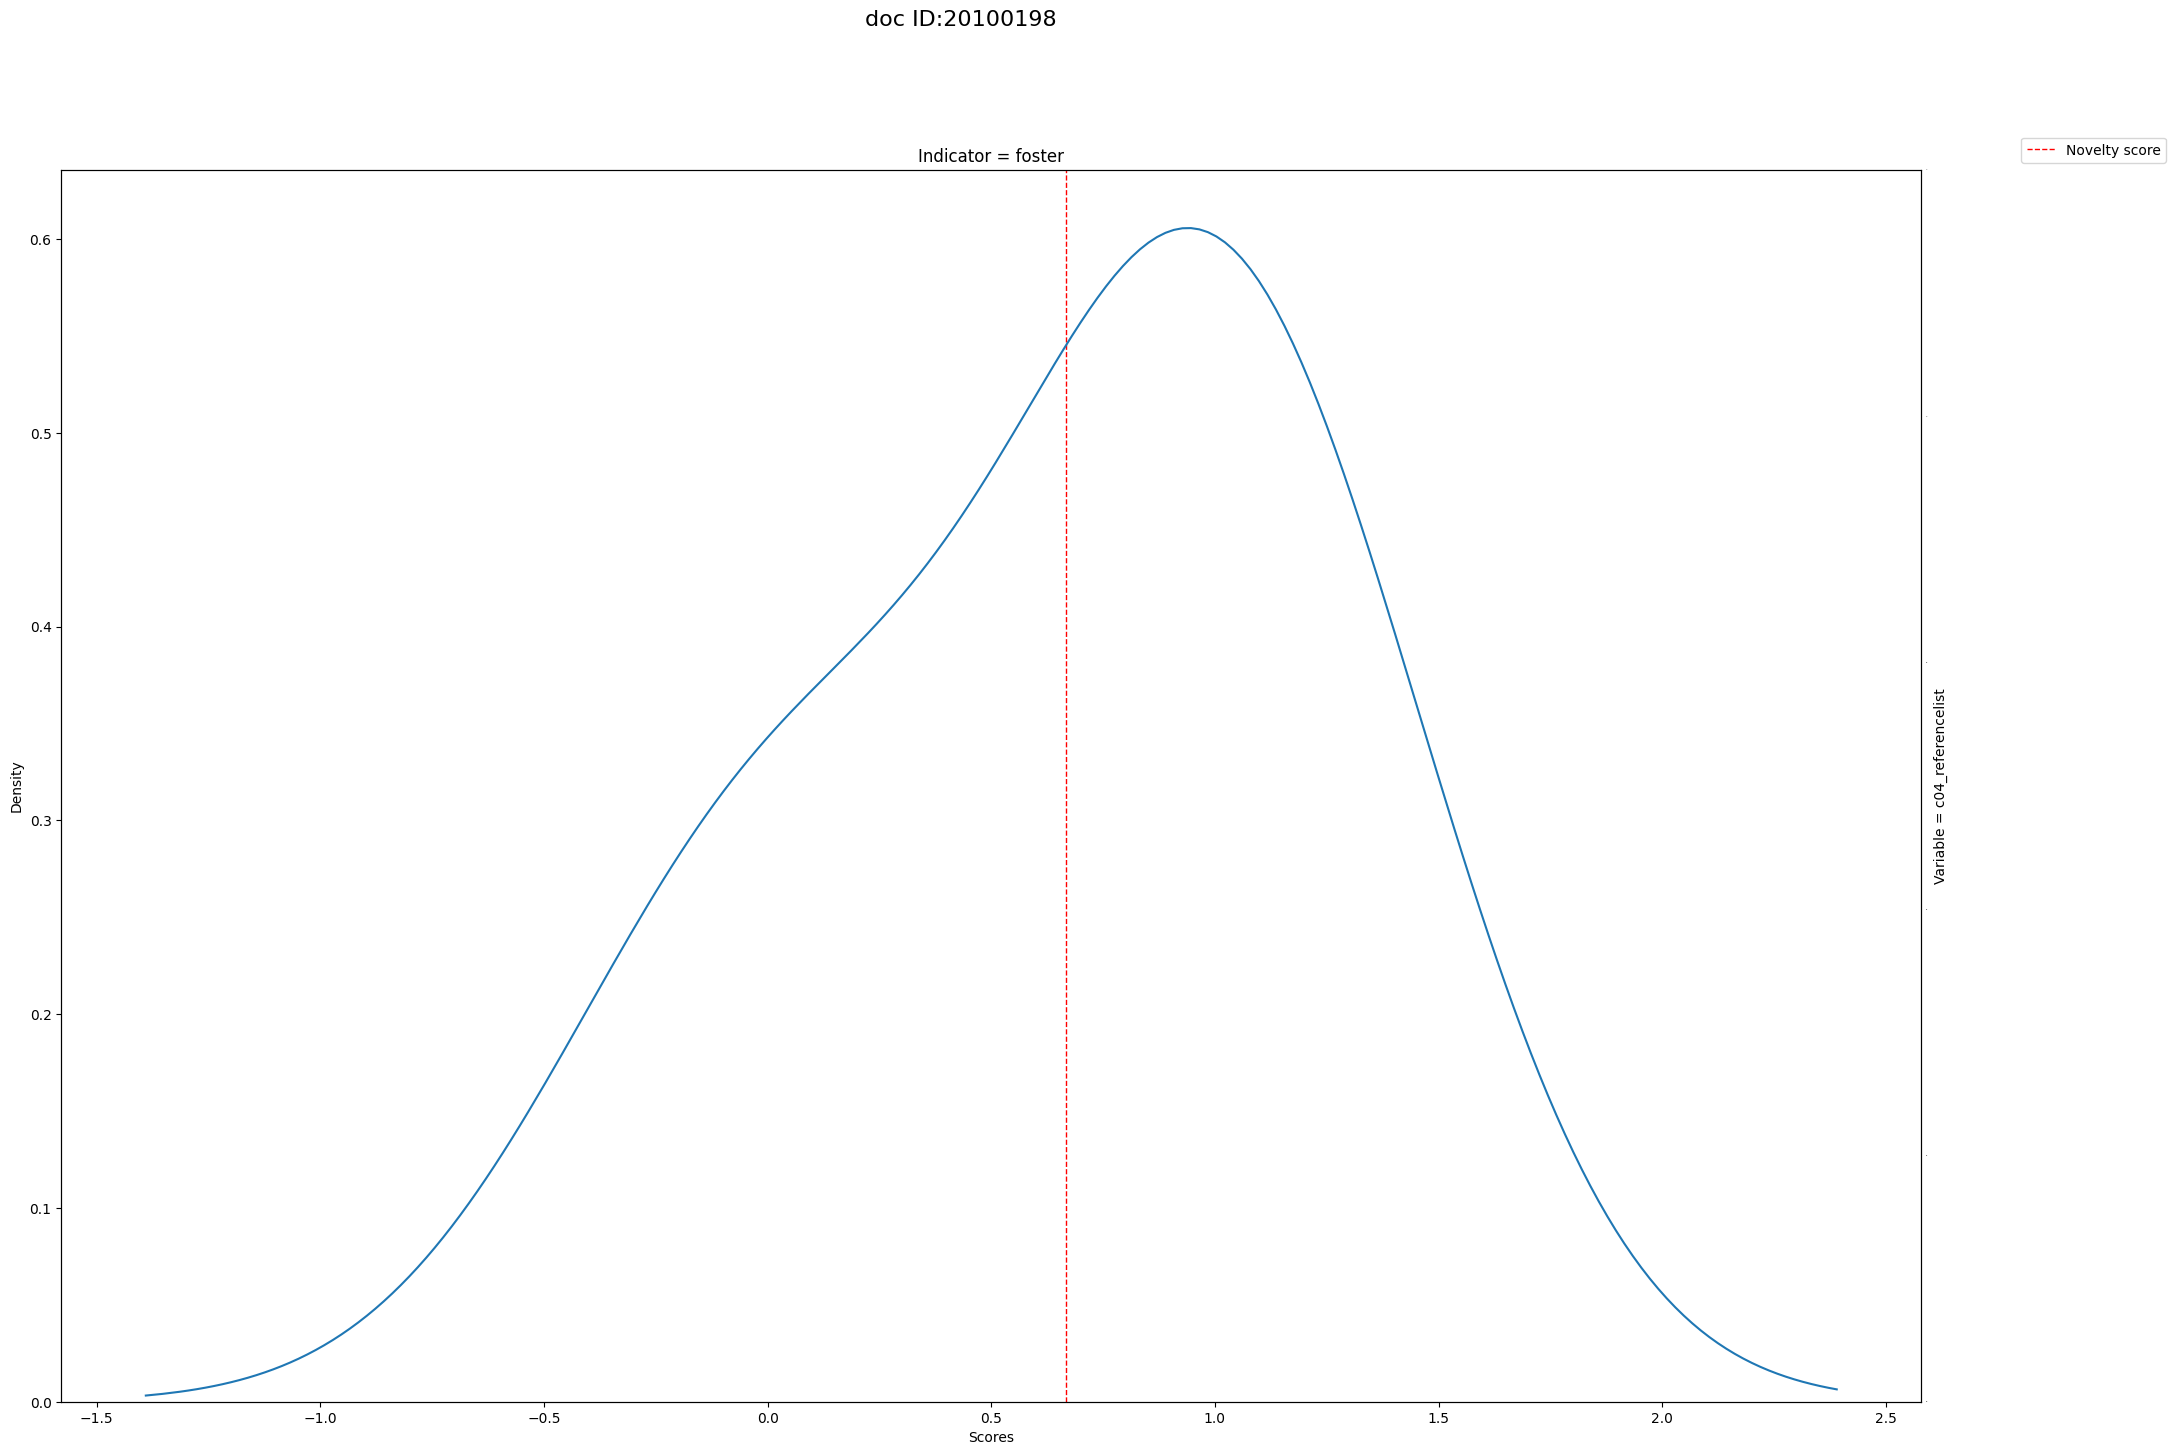

In [10]:
import novelpy

# Easy plot by calling the data just generated, different but issue with mongodb...
#{"PMID": 14525908, "c04_referencelist_foster": {"scores_array": [1.0, 0.0, 1.0], "score": {"novelty": 0.6666666666666666}}, "year": 2004}
dist = novelpy.utils.plot_dist(
                               doc_id = 20100198, #here last pmid from the json file linked to 2010
                               doc_year = 2010,
                               id_variable = "PMID",
                               variables = ["c04_referencelist"],
                               indicators = ["foster"])
dist.get_plot_dist()

In [ ]:
import novelpy

# Trend
trend = novelpy.utils.novelty_trend(year_range = range(2000,2011,1),
              variables = ["c04_referencelist"],
              id_variable = "PMID",
              indicators = ["foster"])

trend.get_plot_trend()

In [ ]:
import os
import json

# Specify the directory where your JSON files are stored
json_directory = "Data/score" #to change

# Dictionary to store novelty scores for each PMID
novelty_scores_dict = {}

# Iterate through each JSON file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        file_path = os.path.join(json_directory, filename)

        # Load JSON data from the file
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        # Iterate through each dictionary in the JSON data
        for entry in json_data:
            pmid = entry["PMID"]
            novelty_score = entry["c04_referencelist_foster"]["score"]["novelty"]

            # Add the novelty score to the dictionary for the corresponding PMID
            if pmid not in novelty_scores_dict:
                novelty_scores_dict[pmid] = []

            novelty_scores_dict[pmid].append(novelty_score)

In [11]:
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

Computing indicator for window of time:   0%|          | 0/11 [00:00<?, ?it/s]

loading cooc for focal year 2000
cooc loaded !
loading items for papers in 2000


get_papers_item: 100%|██████████| 49872/49872 [00:00<00:00, 590240.63it/s]


items_loaded !
Creating sample ...


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.item[df.year == year] = sample(journals_y,k = len(journals_y))
/workspaces/novelpy/novelpy/indicators/Uzzi2013.py:94: FutureWarning: Chai

start sampling


Create sample network: 100%|██████████| 20/20 [00:48<00:00,  2.40s/it]


Sample created !
Getting score per year ...


100%|██████████| 851428/851428 [07:43<00:00, 1837.74it/s]


: 

Generate all novel indicators at once

In [30]:
import novelpy
import tqdm

# all the cooc possible not including the one done above: 10 tasks performed

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Ref_Journals_sample",
                 year_var="year",
                 var = "c04_referencelist",
                 sub_var = "item",
                 time_window = range(1995,2016),
                 weighted_network = False, self_loop = False)

ref_cooc.main()

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Meshterms_sample",
                 year_var="year",
                 var = "Mesh_year_category",
                 sub_var = "descUI",
                 time_window = range(1995,2016),
                 weighted_network = True, self_loop = True)

ref_cooc.main()

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Meshterms_sample",
                 year_var="year",
                 var = "Mesh_year_category",
                 sub_var = "descUI",
                 time_window = range(1995,2016),
                 weighted_network = False, self_loop = False)

ref_cooc.main()


# Uzzi et al.(2013) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

# Uzzi et al.(2013) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

# Foster et al.(2015) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Foster = novelpy.indicators.Foster2015(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           starting_year = 1995,
                                           community_algorithm = "Louvain",
                                           density = True)
    Foster.get_indicator()

# Lee et al.(2015) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Lee = novelpy.indicators.Lee2015(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           density = True)
    Lee.get_indicator()

# Lee et al.(2015) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Lee = novelpy.indicators.Lee2015(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Lee.get_indicator()

# Wang et al.(2017) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011)):
    Wang = novelpy.indicators.Wang2017(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           time_window_cooc = 3,
                                           n_reutilisation = 1,
                                           starting_year = 1995,
                                           density = True)
    Wang.get_indicator()


# Wang et al.(2017) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011)):
    Wang = novelpy.indicators.Wang2017(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           time_window_cooc = 3,
                                           n_reutilisation = 1,
                                           starting_year = 1995,
                                           density = True)
    Wang.get_indicator()

for every year:   0%|          | 0/21 [00:00<?, ?it/s]

Computing indicator for window of time:   0%|          | 0/11 [00:00<?, ?it/s]

loading cooc for focal year 2000
cooc loaded !
loading items for papers in 2000


get_papers_item: 100%|██████████| 49872/49872 [00:00<00:00, 152027.64it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [52:16<00:00, 156.85s/it]


Sample created !
Getting score per year ...


Computing indicator for window of time:   0%|          | 0/11 [1:20:58<?, ?it/s]


KeyboardInterrupt: 

Shibaya et al. 
Here requires the title or abstracts for articles cited by focal papers and, therefore, the id for each paper cited (examples available within the “Title_abs_sample” and “Citation_net_sample” datasets). We then embed the articles using spacy and do a cosine similarity between the embeddings of cited papers for focal papers. One can find a pre train here https://pypi.org/project/scispacy/. We used en_core_sci_lg-0.4.0

In [ ]:
from novelpy.utils.embedding import Embedding

embedding = Embedding(
            year_variable = 'year',
            time_range = range(2000,2011),
            id_variable = 'PMID',
            references_variable = 'refs_pmid_wos',
            pretrain_path = 'en_core_sci_lg-0.4.0/en_core_sci_lg/en_core_sci_lg-0.4.0',
            title_variable = 'ArticleTitle',
            abstract_variable = 'a04_abstract',
            abstract_subvariable = 'AbstractText')

# articles

embedding.get_articles_centroid(
      collection_articles = 'Title_abs_sample',
      collection_embedding = 'embedding',
      year_range = range(2000,2011,1))